# Predicting Forest Cover Types from Cartographic Variables

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix




from collections import Counter

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced


Reading data from CSV into a data frame and adding column names.

In [8]:
forest = pd.read_table("data/covtype.data", sep=",")
cover_types = ['Spruce/fir','Lodgepole pine','Ponderosa pine','Cottonwood/willow','Aspen','Douglas-fir','Krummholz']

/Users/sonalibaliwada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [9]:
forest.columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
'Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8',
'Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16',
'Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24',
'Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32',
'Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',
'Cover_Type']

Checking the size of the data.

In [10]:
print('Data Size:')
print('Number of Rows:', forest.shape[0])
print('Number of Attributes:', forest.shape[1])

Data Size:
Number of Rows: 581011
Number of Attributes: 55


### Descriptive Statistics of Data Set
The statistics are checked for all the variables. 

In [11]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Skewness in All Variables
Skewness is the extent to which a distribution differs from a normal distribution. The bell curve is moved either to the left or the right to be skewed. A postive value shows it is right-skewed and has a longer tail on the right side of the distribution whereas the negitive value shows it is left-skewed and has a longer tail on the left side.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

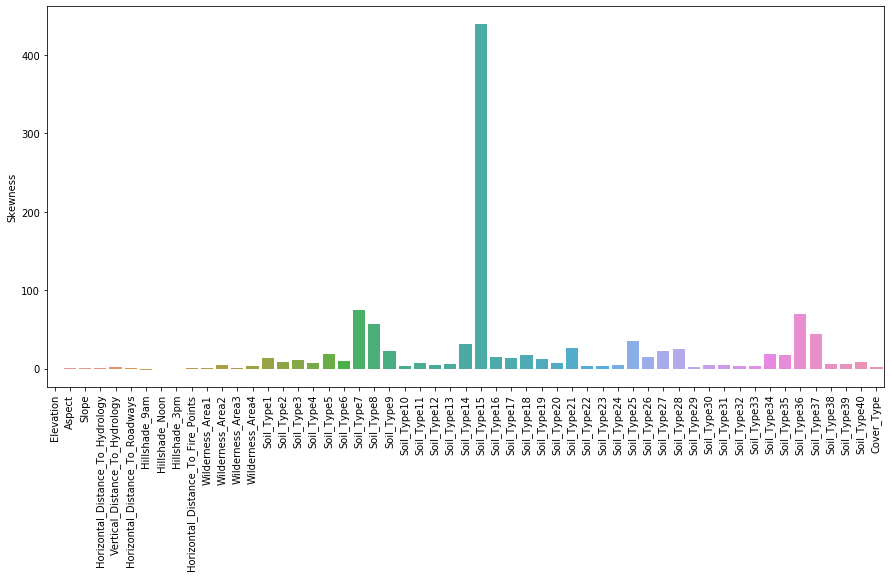

In [12]:
skew = forest.skew()
skew_df = pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

It can be observed from the Bar Plot that some variables are too right-skewed, especially soil_type_15. Such variables might need to be checked individually. 
Continues variables have a distribution close to a normal distribution, whereas Binary variables have more skewness because many observations don't have a particular feature.

### Target Variable Distribution
The target variable is Forest Cover Type. There are 7 possible values (0,1,2,3,4,5,6) of Forest Cover Types. We are analysing how each target variable is distributed across the complete data.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

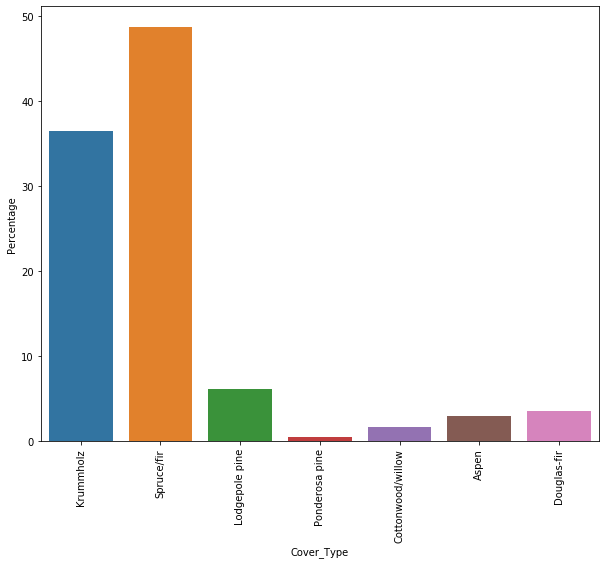

In [13]:
class_distribution = (forest.groupby('Cover_Type').size() / 581011) * 100
percentages = []
for i in enumerate(class_distribution):
    percentages.append( [i[1],cover_types[i[0] - 1]  ] )
#print(percentages)
class_labels = pd.DataFrame(percentages,columns=['Percentage','Cover_Type'])
plt.figure(figsize=(10,8))
sns.barplot(x='Cover_Type',y='Percentage',data=class_labels)
plt.xticks(rotation=90)

Only 0.4% of observations have Ponderosa pine (cover_type_4), which is very low. 48.7% of observations have Spruce/fir (cover_type_2), which makes it is the most dominating cover type. From this observation, we observe that special care needs to be taken while splitting the data for the training dataset, so each target variable has equal representation in our training data — this  would result in a better model that can predict each class accurately.

### Correlation in Continuous Variables
To check all the continuous variables, and see if there are any interesting correlations.

In [14]:
num_of_features = 10
data_continuous = forest.iloc[:,:num_of_features]
cols = data_continuous.columns 
data_corr = data_continuous.corr()
threshold = 0.4
corr_list = []

for i in range(0,num_of_features): #for 'num_of_features' 
    for j in range(i+1,num_of_features): #to avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index
        
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))


for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


It is observed that there are few strong correlations between the pairs, such as:
* Hillshade_9am and Hillshade_3pm
* Aspect and Hillshade_3pm
* Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology
* Hillshade_Noon and Hillshade_3pm
* Aspect and Hillshade_9am
* Slope and Hillshade_Noon

'Hillshade_9am and Hillshade_3pm' has a strong negative relation, which means if there is high value of Hillshade_9am, then Hillshade_3pm will tend to be lesser and vice versa, which is expected. Both the values are of the same thing at different times.

Each of the strong correlations are further explored by plotting (using pairplot) and analysing.

/Users/sonalibaliwada/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


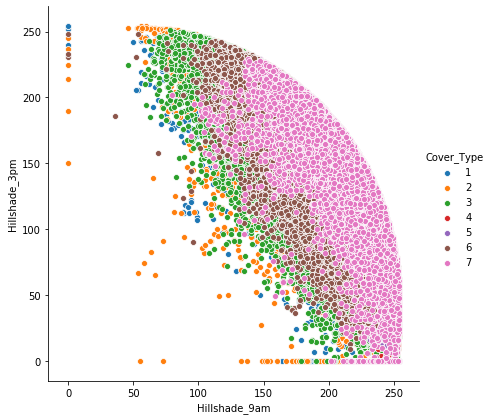

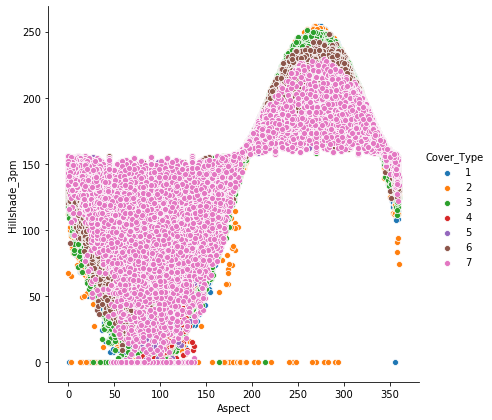

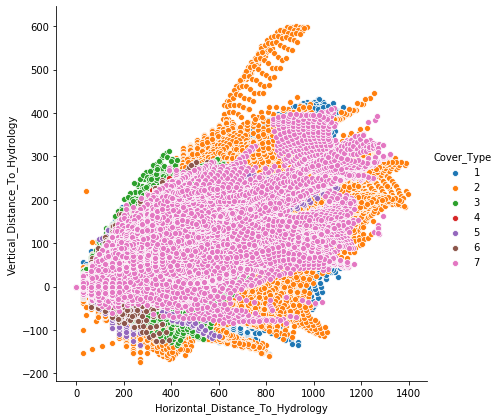

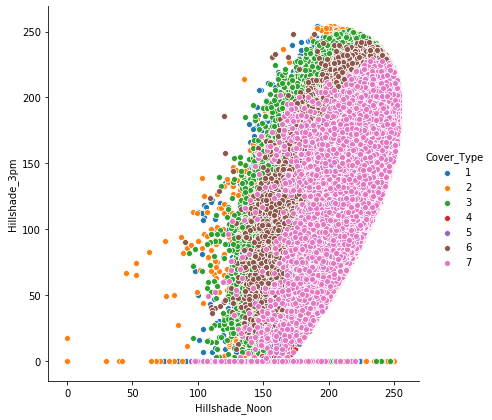

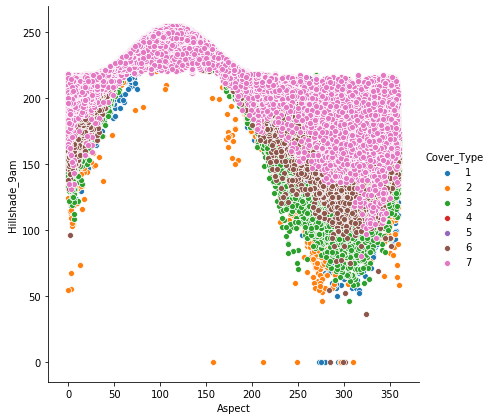

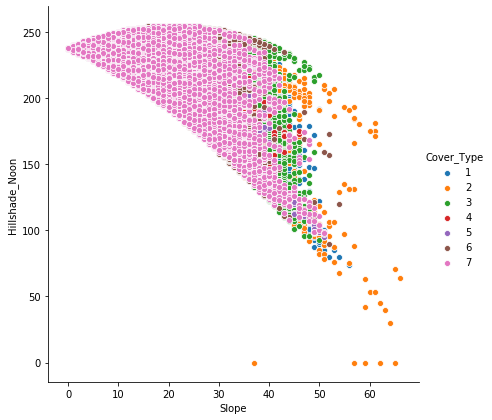

In [15]:
for v,i,j in s_corr_list:
    sns.pairplot(forest, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

The color of each point, represents a particular cover type.
It can be seen that cover type 7 is the most dominating out of all.

It is observed that:
- Hillshade_3pm and Hillshade_9am patterns give an ellipsoid curve patterns with each other.
- Aspect and Hillshade_3pm attributes have a sigmoid curve pattern.
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology give an almost linear pattern.
- Hillshade_3pm and Hillshade_Noon have almost a liner relation.
- Hillshade_9am and Aspect have a parabolic shape, and it cannot be considered a linear relation.
- Slope and Hillshade_Noon have a negative linear relation, in a curve shape.

### Distribution of Continuous variables
The distribution over all the continous variables in the forest dataset is checked using distribution plots.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

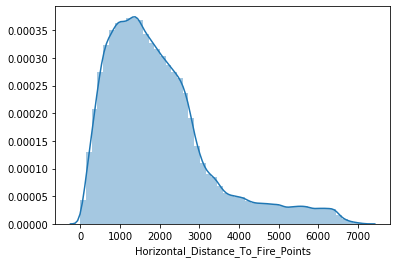

In [16]:
cont_data = forest.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
sns.distplot(cont_data[col])



--------- still need to work on it



It is observed that:
* Elevation:
* Aspect: It has two peaks.
* Slope: It is slightly right-skewed.
* Horizontal_Distance_To_Hydrology: It is slightly right-skewed.
* Vertical_Distance_To_Hydrology:
* Horizontal_Distance_To_Roadways: It is slightly right-skewed.
* Hillshade_9am: It is left-skewed.
* Hillshade_Noon:  It is left-skewed.
* Hillshade_3pm:
* Horizontal_Distance_To_Fire_Points: It is slightly right-skewed.


--------- still need to work on it






 incomplete.....

### Analysis of Binary Columns
Now we'll analyse our binary variables and their distributions, and see if there are any anomalies present.

In [17]:
binary_data=forest.loc[:,'Wilderness_Area1':'Soil_Type40']

/Users/sonalibaliwada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


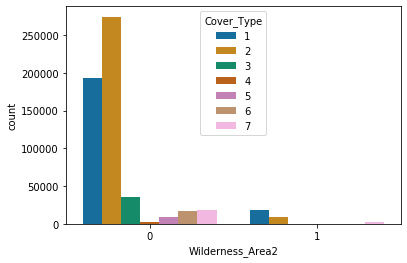

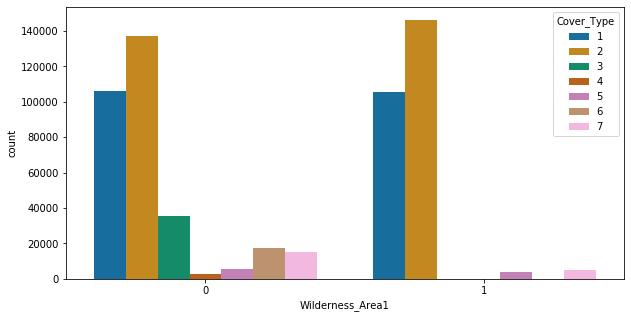

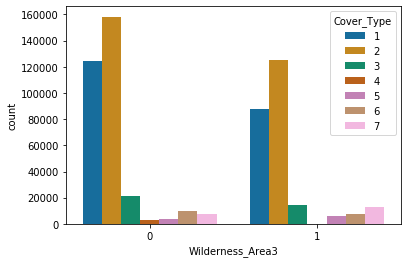

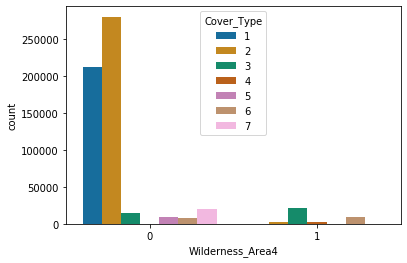

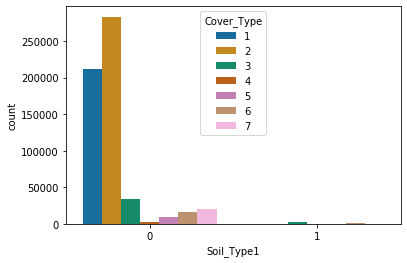

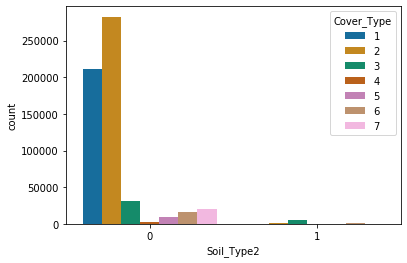

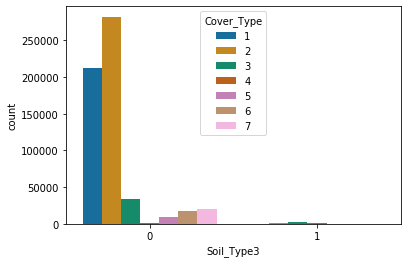

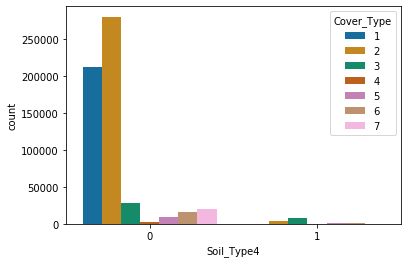

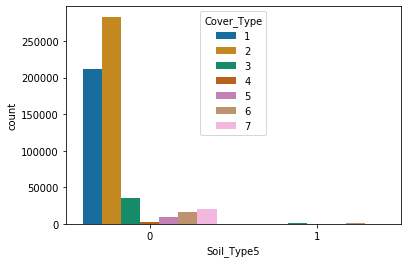

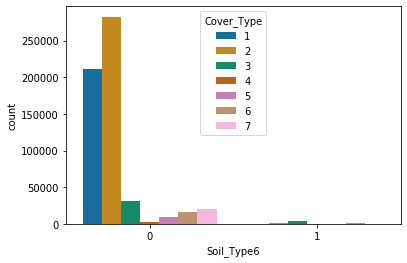

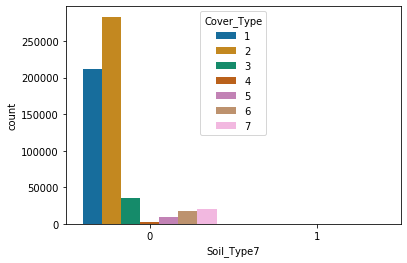

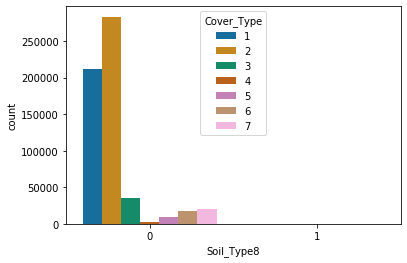

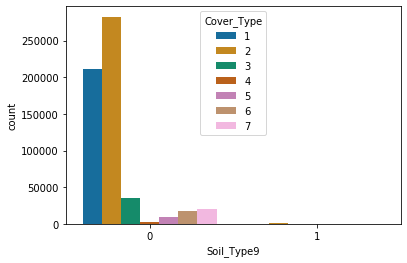

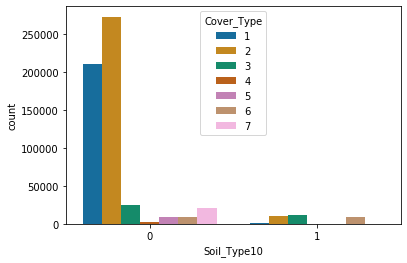

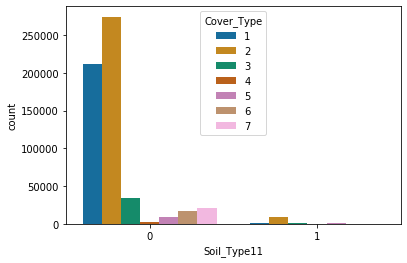

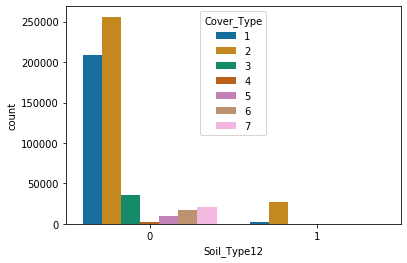

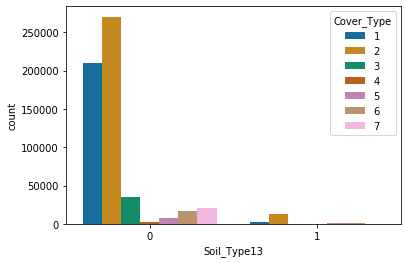

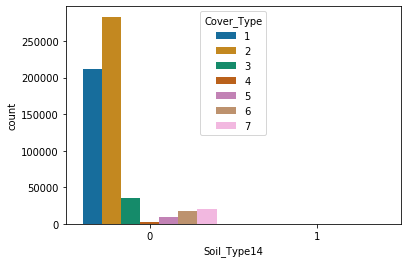

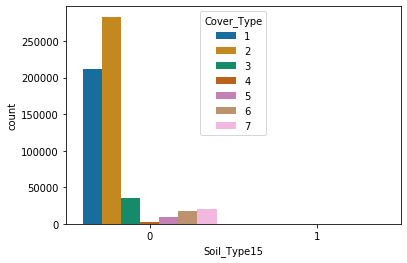

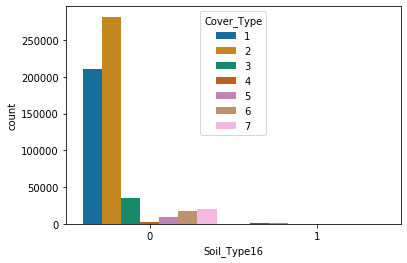

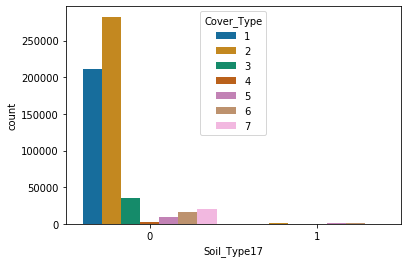

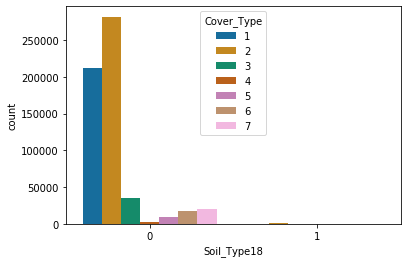

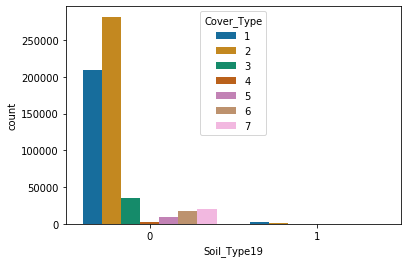

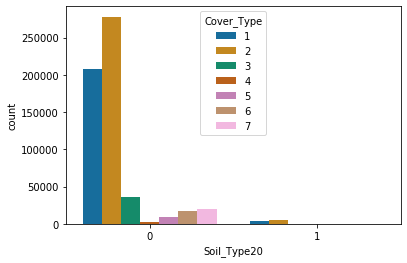

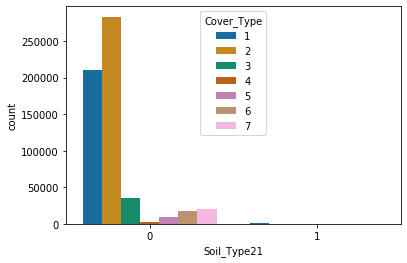

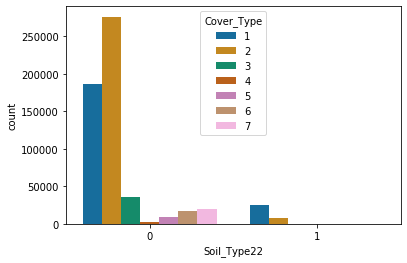

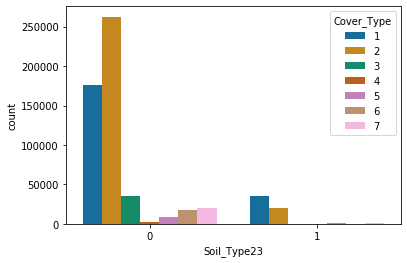

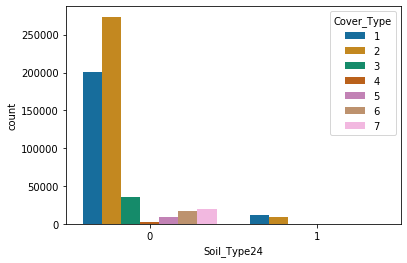

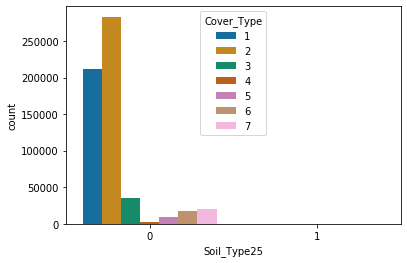

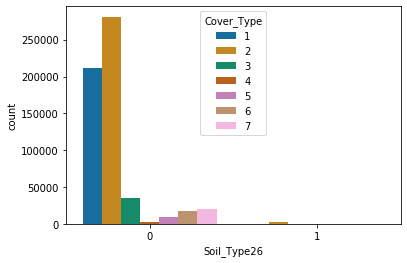

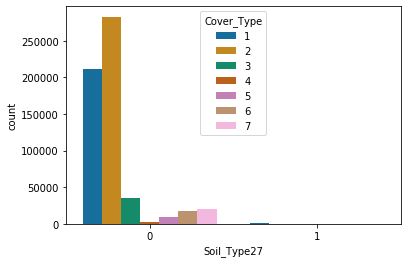

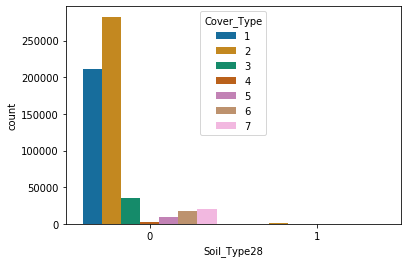

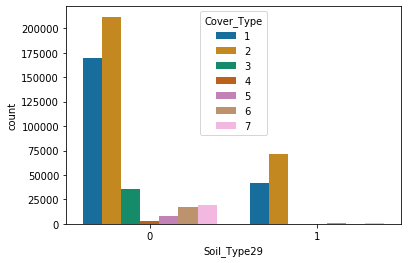

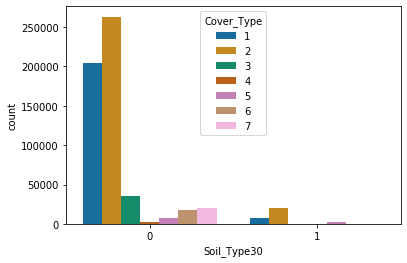

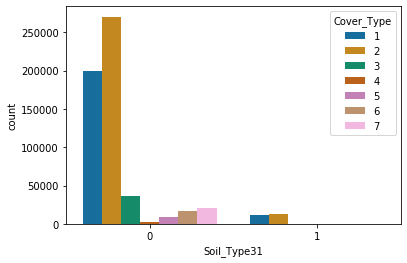

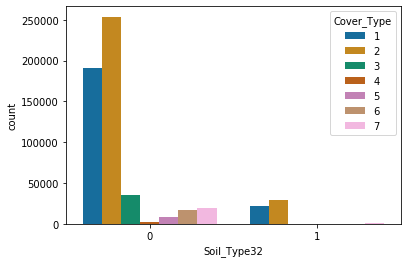

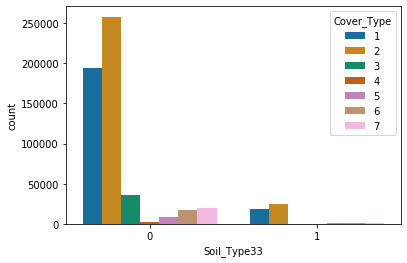

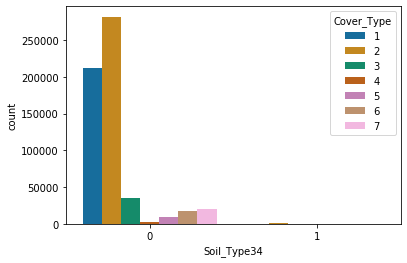

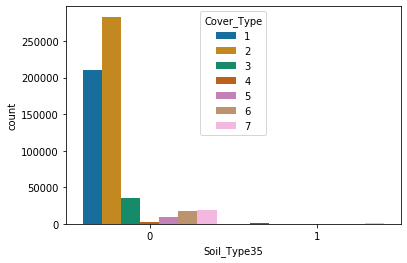

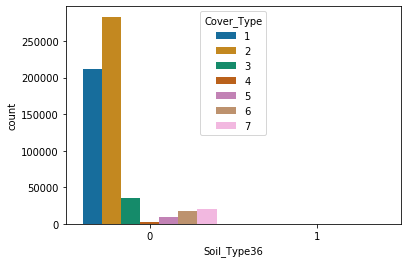

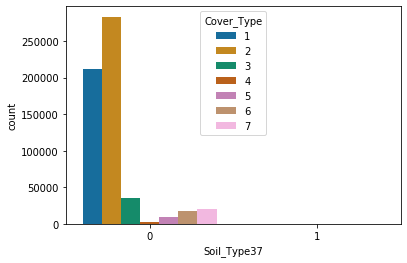

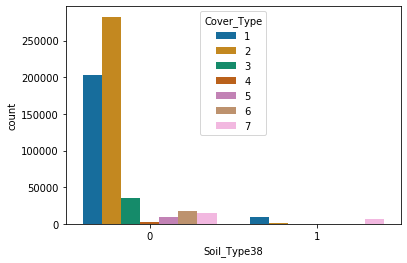

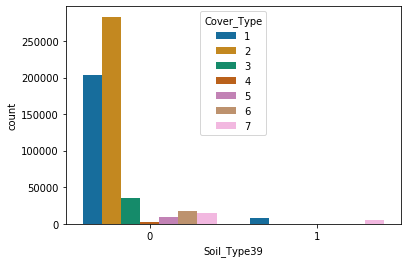

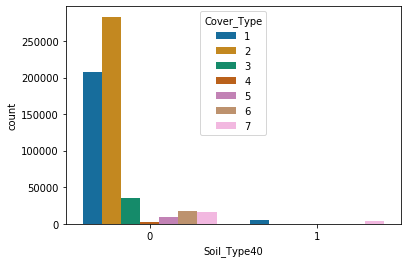

<Figure size 432x288 with 0 Axes>

In [18]:
for i, col in enumerate(binary_data.columns):
    plt.figure()
    plt.figure(i,figsize=(10,5))
    sns.countplot(x=col, hue=forest['Cover_Type'] ,data=forest, palette="colorblind")

 Some variables explaination needed here...............
 ....
 ....
 .....
 ......
 
 * Wilderness_Area1
 * Wilderness_Area2
 * Wilderness_Area12
 * Wilderness_Area22
 * Wilderness_Area23
 * Wilderness_Area29
 * Wilderness_Area32
 * Wilderness_Area33

In [19]:
# for col in binary_data:
#     count=binary_data[col].value_counts()
#     print(col,count)  
# binary_data.plot(kind='bar', stacked=True)


Checking how many and which Cover_Type comes under each soil type.

In [20]:
soil_counts = []
for num in range(1,41):
    col = ('Soil_Type' + str(num))
    this_soil = forest[col].groupby(forest['Cover_Type'])
    totals = []
    for value in this_soil.sum():
        totals.append(value)
    total_sum = sum(totals)
    soil_counts.append(total_sum)
    print("Total Trees in Soil Type {0}: {1}".format(num, total_sum))
    percentages = [ (total*100 / total_sum) for total in totals]
    print("{0}\n".format(percentages))
print("Number of trees in each soil type:\n{0}".format(soil_counts))

Total Trees in Soil Type 1: 3031
[0.0, 0.0, 69.31705707687232, 5.872649290663148, 0.0, 24.810293632464532, 0.0]

Total Trees in Soil Type 2: 7525
[0.0, 11.322259136212624, 66.32558139534883, 1.5282392026578073, 3.5083056478405314, 17.3156146179402, 0.0]

Total Trees in Soil Type 3: 4823
[0.0, 24.694173750777523, 49.98963300850093, 21.107194692100354, 0.0, 4.2089985486211905, 0.0]

Total Trees in Soil Type 4: 12396
[1.468215553404324, 26.22620200064537, 60.511455308163924, 1.3552758954501452, 4.719264278799613, 5.090351726363343, 0.6292352371732817]

Total Trees in Soil Type 5: 1597
[0.0, 0.0, 60.55103318722605, 3.005635566687539, 0.0, 36.44333124608641, 0.0]

Total Trees in Soil Type 6: 6575
[0.0, 13.870722433460076, 60.73003802281369, 4.866920152091255, 0.0, 20.53231939163498, 0.0]

Total Trees in Soil Type 7: 105
[0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 8: 179
[24.022346368715084, 75.97765363128492, 0.0, 0.0, 0.0, 0.0, 0.0]

Total Trees in Soil Type 9: 1147
[14

Checking binary variables that have less than 1000 occurences.

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

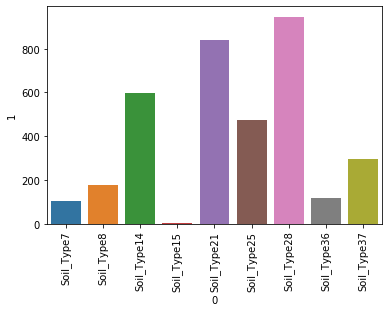

In [21]:
counts_less = []

print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)
        counts_less.append([col,count])

df_occurence = pd.DataFrame.from_records(counts_less)

sns.barplot(x=df_occurence[0],y=df_occurence[1],data=df_occurence)
plt.xticks(rotation=90)

* The histogram above represents the occurences of different soil types and we can observe that the Soil_Type15 has only 3 occurences and it's the most skewed out of all the soil types.
* We can potentially remove this since it's not adding any useful input to our analysis. 

In [22]:
# sns.set(style="ticks")
# sns.pairplot(forest.iloc[:,0:6])

### Outlier Detection & Removal
The outliers need to be detected and removed from the continour data as they do not add value and they are skewing the data too much.

#####  Outlier Detection:

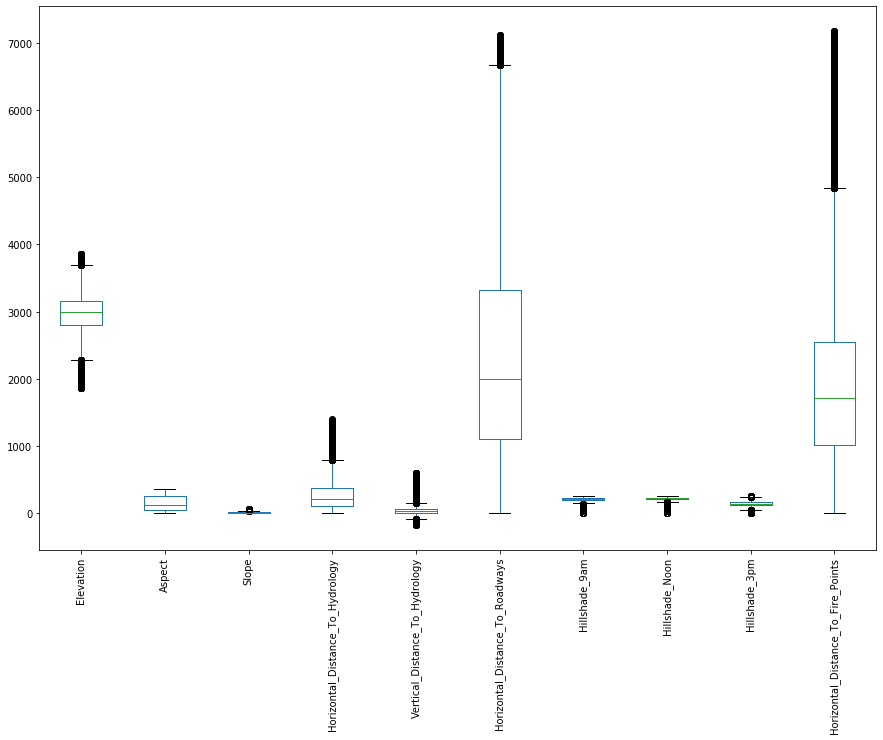

In [23]:
cont_data.head()
cont_data.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

In [24]:
Q1 = cont_data.quantile(0.25)
Q3 = cont_data.quantile(0.75)
IQR = Q3 - Q1

((cont_data < (Q1 - 1.5 * IQR)) | (cont_data > (Q3 + 1.5 * IQR))).sum()

Elevation                             15569
Aspect                                    0
Slope                                 15316
Horizontal_Distance_To_Hydrology      14557
Vertical_Distance_To_Hydrology        31463
Horizontal_Distance_To_Roadways         669
Hillshade_9am                         17433
Hillshade_Noon                        15672
Hillshade_3pm                          7832
Horizontal_Distance_To_Fire_Points    31156
dtype: int64

##### Outliers removal:

In [25]:
cont_data_out_removed = cont_data[(np.abs(stats.zscore(cont_data)) < 3).all(axis=1)]

In [26]:
cont_data_out_removed.shape

(536431, 10)

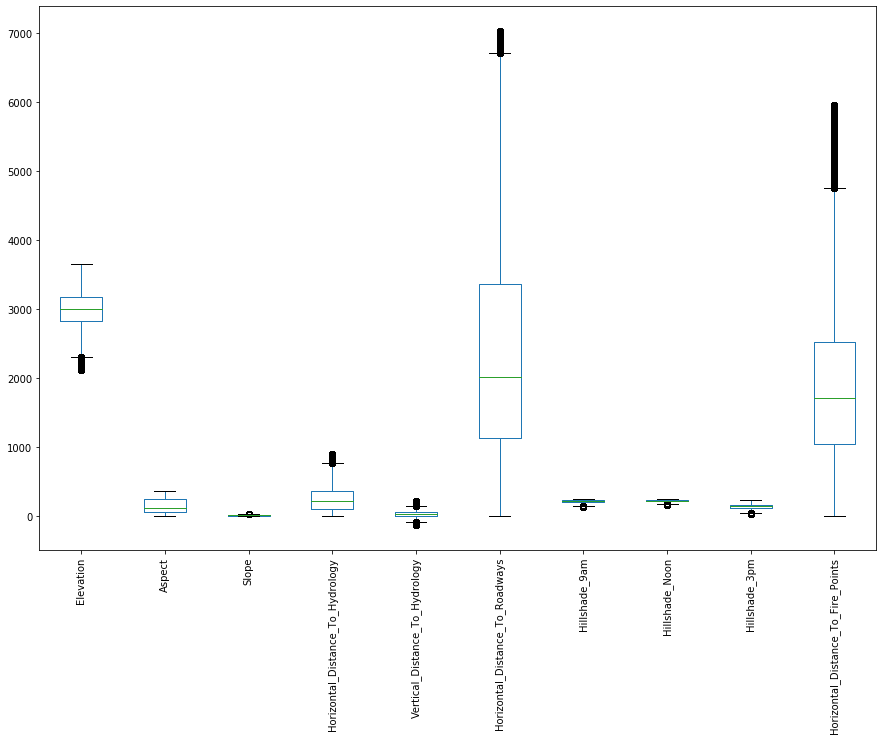

Elevation                              9034
Aspect                                    0
Slope                                  1380
Horizontal_Distance_To_Hydrology       8676
Vertical_Distance_To_Hydrology        24722
Horizontal_Distance_To_Roadways         521
Hillshade_9am                         10704
Hillshade_Noon                         7416
Hillshade_3pm                          3819
Horizontal_Distance_To_Fire_Points    21753
dtype: int64

In [27]:
cont_data_out_removed.plot(kind='box',figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

Q1 = cont_data_out_removed.quantile(0.25)
Q3 = cont_data_out_removed.quantile(0.75)
IQR = Q3 - Q1

((cont_data_out_removed < (Q1 - 1.5 * IQR)) | (cont_data_out_removed > (Q3 + 1.5 * IQR))).sum()



### Remove Outliers from the forest dataset:

In [28]:
forest_clean = forest.drop(list(df_occurence[0]), axis = 1)
# print (len(df_occurence))
forest_clean.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,1,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


### Spliting Data
As observed above, our data has imbalanced so we need to resample it. This needs to be done in order to make our training data have balanced target classes.

In [29]:
forest_clean['Cover_Type'].unique()
forest_clean['ID'] =  forest_clean.index
forest_clean

# Separate majority and minority classes

df_cover_type_1 = forest_clean[forest_clean.Cover_Type == 1]
df_cover_type_2 = forest_clean[forest_clean.Cover_Type == 2]
df_cover_type_3 = forest_clean[forest_clean.Cover_Type == 3]
df_cover_type_4 = forest_clean[forest_clean.Cover_Type == 4]
df_cover_type_5 = forest_clean[forest_clean.Cover_Type == 5]
df_cover_type_6 = forest_clean[forest_clean.Cover_Type == 6]
df_cover_type_7 = forest_clean[forest_clean.Cover_Type == 7]

# resample 1500 rows from each class into our traning data


# Upsample minority class
df_cover_type_1_resampled = resample(df_cover_type_1, replace=True, n_samples=1500, random_state=123)
df_cover_type_2_resampled = resample(df_cover_type_2, replace=True, n_samples=1500, random_state=123)
df_cover_type_3_resampled = resample(df_cover_type_3, replace=True, n_samples=1500, random_state=123)
df_cover_type_4_resampled = resample(df_cover_type_4, replace=True, n_samples=1500, random_state=123)
df_cover_type_5_resampled = resample(df_cover_type_5, replace=True, n_samples=1500, random_state=123)
df_cover_type_6_resampled = resample(df_cover_type_6, replace=True, n_samples=1500, random_state=123)
df_cover_type_7_resampled = resample(df_cover_type_7, replace=True, n_samples=1500, random_state=123)



# # Combine majority class with upsampled minority class
df_balanced = pd.concat([df_cover_type_1_resampled, 
                         df_cover_type_2_resampled,
                        df_cover_type_3_resampled,
                        df_cover_type_4_resampled,
                        df_cover_type_5_resampled,
                        df_cover_type_6_resampled,
                        df_cover_type_7_resampled])


In [30]:
test_df = forest_clean.loc[forest_clean['ID'].isin(list(df_balanced['ID'])) == False]
train_df = df_balanced.drop(['ID'],axis = 1)
test_df = test_df.drop(['ID'],axis = 1)

### Baseline Model - Linear Regression
A baseline model using linear regression is created in order to use it as a reference point to track the progress.

In [31]:
y_train_df = train_df['Cover_Type']
X_train_df = train_df.drop(['Cover_Type'],axis =1)

y_test_df = test_df['Cover_Type']
X_test_df = test_df.drop(['Cover_Type'],axis =1)

In [32]:
# linear regression
reg = linear_model.LinearRegression()
reg.fit(X_train_df, y_train_df)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-1.04795141e-04  1.84561437e-04  7.68590481e-03 -1.00933114e-03
  1.30243007e-03 -1.78028980e-04  1.51989478e-02 -1.16896799e-02
  1.01633431e-02  1.24162538e-04 -5.11522084e-01 -4.53702201e-01
  6.88512666e-01  2.76711619e-01 -3.30566227e-01 -4.40114472e-01
 -6.52406092e-01 -8.68670935e-01  1.77942308e-01 -2.45640834e-01
 -1.81776990e+00  2.22456452e-01 -5.87775681e-01 -1.54740310e+00
 -1.15171822e-01 -1.24391588e-01 -1.70455342e-01 -4.21248402e-01
 -1.25349442e+00 -7.02718608e-01 -2.25838190e+00 -1.19003034e+00
 -1.77457999e+00 -7.83739486e-01 -6.96157043e-01 -6.71048373e-01
  4.48743955e-01 -1.87972875e+00 -1.46788859e+00 -1.18816444e+00
  7.61378519e-01  2.65849184e+00  2.50508783e+00  2.30733337e+00
  2.59131657e+00] + 2.314837351235731


In [33]:
predicted = reg.predict(X_test_df)
mse = ((np.array(y_test_df)-predicted)**2).sum()/len(y_test_df)
r2 = r2_score(y_test_df, predicted)
print("MSE:", mse)
print("R Squared:", r2)
print("Score",reg.score(X_test_df,y_test_df))
# confusion_matrix(y_test_df, predicted)

MSE: 3.1672516643095427
R Squared: -0.7143195175594512
Score -0.7143195175594512


This baseline model has the score of 71%.

### Feature Extraction
Few important features from the forest dataset are extracted using RFE. 

In [47]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
feature_cols= np.array(['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points',
'Wilderness_Area1',
'Wilderness_Area2',
'Wilderness_Area3',
'Wilderness_Area4',
'Soil_Type1',
'Soil_Type2',
'Soil_Type3',
'Soil_Type4',
'Soil_Type5',
'Soil_Type6',
'Soil_Type7',
'Soil_Type8',
'Soil_Type9',
'Soil_Type10',
'Soil_Type11',
'Soil_Type12',
'Soil_Type13',
'Soil_Type14',
'Soil_Type15',
'Soil_Type16',
'Soil_Type17',
'Soil_Type18',
'Soil_Type19',
'Soil_Type20',
'Soil_Type21',
'Soil_Type22',
'Soil_Type23',
'Soil_Type24',
'Soil_Type25',
'Soil_Type26',
'Soil_Type27',
'Soil_Type28',
'Soil_Type29',
'Soil_Type30',
'Soil_Type31',
'Soil_Type32',
'Soil_Type33',
'Soil_Type34',
'Soil_Type35',
'Soil_Type36',
'Soil_Type37',
'Soil_Type38',
'Soil_Type39',
'Soil_Type40',
'Cover_Type'])
estimator= LinearRegression()
sel= RFE (estimator,20)
sel= sel.fit(X_train_df,y_train_df)

supp=sel.get_support(54)
print("Selected features:", feature_cols[supp])
print("Coeffs:", sel.estimator_.coef_)

#testing
predicted=sel.predict(X_test_df)
print("MSE:", mean_squared_error(y_test_df, predicted))
print("R^2:", r2_score(y_test_df, predicted))

Selected features: ['Wilderness_Area1' 'Wilderness_Area2' 'Wilderness_Area3'
 'Wilderness_Area4' 'Soil_Type7' 'Soil_Type8' 'Soil_Type10' 'Soil_Type15'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type21' 'Soil_Type23'
 'Soil_Type24' 'Soil_Type25' 'Soil_Type26' 'Soil_Type28' 'Soil_Type29'
 'Soil_Type30' 'Soil_Type31']
Coeffs: [-1.66078462e+13 -1.66078462e+13 -1.66078462e+13 -1.66078462e+13
 -9.55408988e-01  5.88265899e-01 -8.77727024e-01 -9.66817025e-01
 -1.90305473e+00 -7.72338583e-01 -1.39995412e+00 -8.76610188e-01
  1.25902170e+00 -1.56622645e+00 -1.18475409e+00 -8.21121064e-01
  2.93517738e+00  2.63918869e+00  2.55928100e+00  2.65731179e+00]
MSE: 3.2936612919072563
R^2: -0.7827405067218087


In [45]:
feature_cols.shape



(55,)

In [48]:
selected_features = pd.DataFrame(['Wilderness_Area1' 'Wilderness_Area2' 'Wilderness_Area3'
 'Wilderness_Area4' 'Soil_Type7' 'Soil_Type8' 'Soil_Type10' 'Soil_Type15'
 'Soil_Type17' 'Soil_Type18' 'Soil_Type19' 'Soil_Type21' 'Soil_Type23'
 'Soil_Type24' 'Soil_Type25' 'Soil_Type26' 'Soil_Type28' 'Soil_Type29'
 'Soil_Type30' 'Soil_Type31'])

In [ ]:
#pca projection

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train_df)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2937.248130,1884.809704,48.070212,30.637751,-56.537653,12.231873,9.239417,-4.849371,-1.688067,1.253950,0.432940,0.329953,0.088386,0.209536,0.025054,0.046642,0.063603,0.092783,0.186561,0.205046
1,2179.414601,425.363850,-8.328891,-70.104412,196.393737,-9.809681,-32.436825,20.857083,-3.382076,-1.250202,0.760343,-0.384704,-0.130963,-0.562014,0.005519,0.029137,-0.012691,-0.022142,-0.025809,-0.007912
2,4252.723060,818.042715,-568.800356,-10.506659,173.798860,-5.626623,-26.067655,5.563785,-3.840026,-0.224202,0.187588,0.027768,-0.077935,0.566269,-0.307083,0.621123,-0.201806,-0.156436,-0.093375,-0.126413
3,1337.559072,-909.531342,133.743511,126.169286,112.975827,40.567155,39.577559,11.336869,10.688557,-0.665747,-0.318495,-0.021135,-0.184141,0.049144,-0.082286,-0.039797,-0.008714,0.017671,-0.006850,0.030513
4,-934.163305,38.770691,870.864003,193.525002,133.143287,22.281935,-3.643104,-14.052502,-5.740751,0.973627,-0.180846,-0.045302,-0.011081,-0.159112,-0.154109,-0.148104,-0.094528,0.137788,-0.449258,0.520305
5,-165.309312,740.096684,444.151844,-201.231685,30.863695,3.525803,-4.027835,-26.266511,4.896741,-0.784502,0.456567,0.637581,0.083527,0.207623,-0.288709,0.882503,-0.198615,-0.255369,0.396118,0.061994
6,806.320314,1630.218758,216.424330,73.913724,-104.962206,-72.693627,63.984471,0.703326,-4.272573,-1.141745,-0.726013,0.044688,-0.145310,-0.024642,-0.082875,-0.046705,0.042945,-0.006144,-0.061156,-0.048245
7,1369.267860,-2144.593518,49.221600,-210.965262,-86.878823,16.173966,10.521719,-6.422981,-4.665702,1.092691,-0.532980,0.137563,-0.000234,0.246969,-0.288619,0.631553,-0.234419,-0.233830,-0.081315,-0.085475
8,445.035633,1341.285925,679.107429,37.852943,-104.953935,-7.491804,68.919283,-10.841981,-4.683077,1.493548,-0.444868,0.316726,0.003245,-0.163303,-0.143733,-0.184859,-0.055129,0.117468,-0.466817,0.524818
9,609.228714,-1680.384972,166.708103,12.111904,-117.262334,21.087499,-2.595604,0.054453,-3.848712,-0.701905,1.014565,-0.606886,0.023162,-0.550248,0.004099,0.066345,-0.011915,-0.024869,0.025434,0.024701


### Build a Naive Bayes Model with extracted feature
A model is built using the Naive Bayes and the extracted features to check how well this model works againist the others. 

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [59]:
model = GaussianNB()
model.fit(X_train_df, y_train_df)
y_pred = model.predict(X_test_df)


In [60]:
model.score(X_test_df,y_test_df)

0.39900787779351743

In [62]:
#the model accuracy,the classifier is right only about 40% of the time
from sklearn import metrics
metrics.accuracy_score(y_test_df,y_pred)

0.39900787779351743

### Neural Network with Extracted features

### Compare All Models - (Plots)